# Object Detection Procedure


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 79235, done.
remote: Counting objects: 100% (562/562), done.
remote: Compressing objects: 100% (277/277), done.
remote: Total 79235 (delta 333), reused 492 (delta 283), pack-reused 78673
Receiving objects: 100% (79235/79235), 593.96 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (56306/56306), done.


In [ ]:
from google.colab import drive
# usleep(rand(1000000,2000000);
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/tensorflow1/models/research/object_detection'

/content/drive/MyDrive/tensorflow1/models/research/object_detection


In [ ]:
!ls

anchor_generators			       input
box_coders				       inputs.py
builders				       inputs_test.py
colab_tutorials				       legacy
configs					       matchers
CONTRIBUTING.md				       meta_architectures
core					       metrics
data					       model_hparams.py
data_decoders				       model_lib.py
dataset_tools				       model_lib_tf1_test.py
dockerfiles				       model_lib_tf2_test.py
eval_util.py				       model_lib_v2.py
eval_util_test.py			       model_main.py
exporter_lib_tf2_test.py		       model_main_tf2.py
exporter_lib_v2.py			       models
exporter_main_v2.py			       model_tpu_main.py
exporter.py				       object_detection
exporter_tf1_test.py			       output
export_inference_graph.py		       packages
export_tflite_graph_lib_tf2.py		       predictors
export_tflite_graph_lib_tf2_test.py	       protos
export_tflite_graph_tf2.py		       README.md
export_tflite_ssd_graph_lib.py		       samples
export_tflite_ssd_graph_lib_tf1_test.py        test_data
export_tflite_ssd_graph.py		   

In [ ]:
!python xml_to_csv.py

In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record

2021-04-29 05:56:18.600380: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/My Drive/tensorflow1/models/research/object_detection/train.record


In [ ]:
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

2021-04-29 05:57:48.748949: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/My Drive/tensorflow1/models/research/object_detection/test.record


In [ ]:
!python generate_labelmap.py

In [ ]:
%cd '/content/drive/MyDrive/tensorflow1/'
!ls

/content/drive/MyDrive/tensorflow1
'Diet buddy.ipynb'					    models
 faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar   new.ipynb


In [ ]:
!unzip "faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar"

Archive:  faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar or
        faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar.zip, and cannot find faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar.ZIP, period.


In [ ]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 6.1MB/s 


In [ ]:
from pyunpack import Archive
Archive('faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar').extractall('/content/drive/MyDrive/tensorflow1')
!tar -xvf 'faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar'

faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet101_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
!python model_main_tf2.py --pipeline_config_path=training/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.config --model_dir=training --alsologtostderr

2021-05-01 02:41:41.189468: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-01 02:41:43.990859: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-01 02:41:43.991728: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-01 02:41:44.022936: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-01 02:41:44.023528: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-01 02:41:44.023567: I tensorflow/stream_executor/platform/default/dso_loade

In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!pip install tf-models-official
!pip install tf-slim
!pip install lvis

     |████████████████████████████████| 1.1MB 16.4MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 706kB 48.7MB/s 
     |████████████████████████████████| 1.2MB 54.1MB/s 
     |████████████████████████████████| 645kB 51.8MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 174kB 53.4MB/s 
     |████████████████████████████████| 37.6MB 77kB/s 
     |████████████████████████████████| 358kB 54.5MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-cp37-none-any.whl size=16172 sha256=90414d8e726f83b233f365bf29dd7d893f7390a26ff779c1368514e05e6737cc
  Stored in directory: /root/.cache/pip/wheels/52/df/1b/45d75646c37428f7e626214704a0e35bd3cfc32eda37e59e5f
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-cp37-none-any.whl size=22245 sha256=0ad3ba5a7f981ac768d46afffdfbd59ea3030a5abb8c629f29ee814643a93996
  Stored in directory: /root/.cache/pip/wheels/2e/15/f5/aa2a056d223903b52cf48701

In [ ]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.tfrecord
!python generate_tfrecord.py --csv_input=images/test_labels.csv  --image_dir=images/test --output_path=test.tfrecord

2021-05-01 02:41:28.485725: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/My Drive/tensorflow1/models/research/object_detection/train.tfrecord
2021-05-01 02:41:30.935869: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Successfully created the TFRecords: /content/drive/My Drive/tensorflow1/models/research/object_detection/test.tfrecord


In [ ]:
!python exporter_main_v2.py --trained_checkpoint_dir=training --pipeline_config_path=training/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.config --output_directory inference_graph

2021-05-02 03:09:31.741197: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-05-02 03:10:00.560409: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-05-02 03:10:00.561493: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-05-02 03:10:00.630023: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-05-02 03:10:00.630642: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2021-05-02 03:10:00.630689: I tensorflow/stream_executor/platform/default/dso_loade

# Object Detection

In [ ]:
!pip install -U --pre tensorflow=="2.*"
!pip install tf_slim
from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 6.4 kB/s 
     |████████████████████████████████| 1.7 MB 51.9 MB/s 
     |████████████████████████████████| 439 kB 52.5 MB/s 
     |████████████████████████████████| 6.0 MB 42.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully 

Checking of `pycocotools` is installed or not

In [ ]:
!pip install pycocotools
%cd '/content/drive/MyDrive/tensorflow1/'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/drive/MyDrive/tensorflow1


Get `tensorflow/models` or `cd` to parent directory of the repository.

In [ ]:
import os
import pathlib


if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Compile protobufs and install the object_detection package

In [ ]:
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.

In [ ]:
%%bash
cd models/research
pip install .

ERROR: Directory '.' is not installable. Neither 'setup.py' nor 'pyproject.toml' found.


CalledProcessError: ignored

### Imports

In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

!pip install tf_slim

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Import the object detection module.

In [ ]:
!pip install tensorflow-object-detection-api
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 29.3 MB/s 
     |████████████████████████████████| 121 kB 67.3 MB/s 
     |████████████████████████████████| 1.6 MB 54.6 MB/s 
     |████████████████████████████████| 83 kB 2.6 MB/s 
     |████████████████████████████████| 237 kB 73.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 48 kB 3.0 MB/s 
     |████████████████████████████████| 4.0 MB 46.6 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844511 sha256=e70986bf0083385f18a9a0c97fb95fe8a3dc1288c28378ab2429d67c0ddae7fb
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


Patches:

In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

## Model preparation

## Loading label map
Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

In [ ]:
%cd '/content/drive/MyDrive/tensorflow1'
PATH_TO_LABELS = 'models/research/object_detection/images/labelmap.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

/content/drive/MyDrive/tensorflow1


Get how many images are in input:

In [ ]:
import pathlib
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('models/research/object_detection/input')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('models/research/object_detection/input/3apples.jpg'),
 PosixPath('models/research/object_detection/input/apple2.jpg'),
 PosixPath('models/research/object_detection/input/chk1.jpg'),
 PosixPath('models/research/object_detection/input/man3.jpg'),
 PosixPath('models/research/object_detection/input/orange.jpg'),
 PosixPath('models/research/object_detection/input/pea.jpg'),
 PosixPath('models/research/object_detection/input/pin.jpg'),
 PosixPath('models/research/object_detection/input/strawberry.jpg'),
 PosixPath('models/research/object_detection/input/test 2.jpg'),
 PosixPath('models/research/object_detection/input/watermelon.jpg')]

## Detection

Load an object detection model:

In [ ]:
%cd '/content/drive/MyDrive/tensorflow1/models/research/object_detection/inference_graph/'
detection_model = tf.saved_model.load('saved_model')

/content/drive/MyDrive/tensorflow1/models/research/object_detection/inference_graph


Check the model's input signature, it expects a batch of 3-color images of type uint8:

In [ ]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_0:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_1:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_2:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_3:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_4:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_5:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_6:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_7:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_8:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_9:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_10:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_11:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_12:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_13:0' shape=<unknown> dtype=resource>, <tf.Tensor 'unknown_14:0' shape=<unknown> dtype=resource>, <

And returns several outputs:

In [ ]:
detection_model.signatures['serving_default'].output_dtypes

{'detection_anchor_indices': tf.float32,
 'raw_detection_scores': tf.float32,
 'num_detections': tf.float32,
 'detection_multiclass_scores': tf.float32,
 'detection_scores': tf.float32,
 'raw_detection_boxes': tf.float32,
 'detection_boxes': tf.float32,
 'detection_classes': tf.float32}

In [ ]:
detection_model.signatures['serving_default'].output_shapes

{'detection_anchor_indices': TensorShape([1, 300]),
 'raw_detection_scores': TensorShape([1, 300, 9]),
 'num_detections': TensorShape([1]),
 'detection_multiclass_scores': TensorShape([1, 300, 9]),
 'detection_scores': TensorShape([1, 300]),
 'raw_detection_boxes': TensorShape([1, 300, 4]),
 'detection_boxes': TensorShape([1, 300, 4]),
 'detection_classes': TensorShape([1, 300])}

Add a wrapper function to call the model, and cleanup the outputs:

In [ ]:
acc = []

def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]


  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)


  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

Show inference model function

In [ ]:
def show_inference(model, image_path):
  image_np = np.array(Image.open(image_path))
  output_dict = run_inference_for_single_image(model, image_np)

  # print(output_dict['detection_scores'])

  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=4)

  img = Image.fromarray(image_np);

  display(img)
  fileName = str(image_path).split("/")[-1:][0]
  img.save(f'/content/drive/MyDrive/tensorflow1/models/research/object_detection/output/{fileName}')

Run it on each test image and show the results:

In [ ]:
%cd "/content/drive/My Drive/tensorflow1"
!ls

/content/drive/My Drive/tensorflow1
'Diet buddy.ipynb'					    models
 faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz.tar   new.ipynb


In [ ]:
TEST_IMAGE_PATHS

[PosixPath('models/research/object_detection/input/3apples.jpg'),
 PosixPath('models/research/object_detection/input/apple2.jpg'),
 PosixPath('models/research/object_detection/input/chk1.jpg'),
 PosixPath('models/research/object_detection/input/man3.jpg'),
 PosixPath('models/research/object_detection/input/orange.jpg'),
 PosixPath('models/research/object_detection/input/pea.jpg'),
 PosixPath('models/research/object_detection/input/pin.jpg'),
 PosixPath('models/research/object_detection/input/strawberry.jpg'),
 PosixPath('models/research/object_detection/input/test 2.jpg'),
 PosixPath('models/research/object_detection/input/watermelon.jpg')]

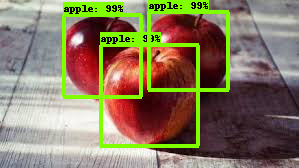

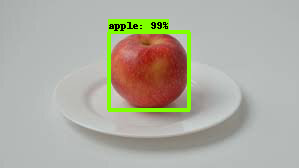

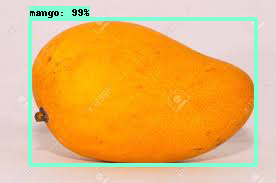

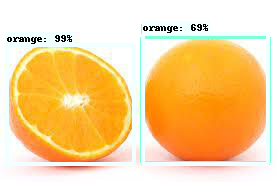

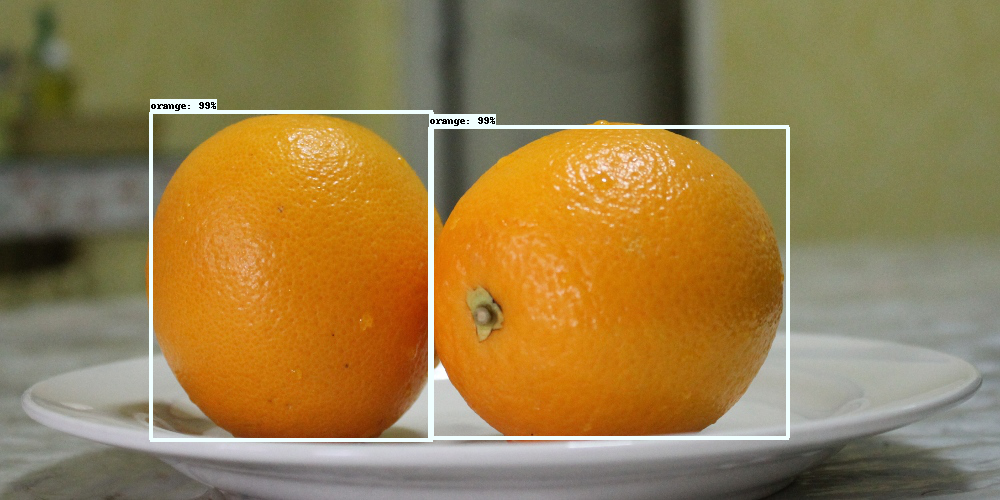

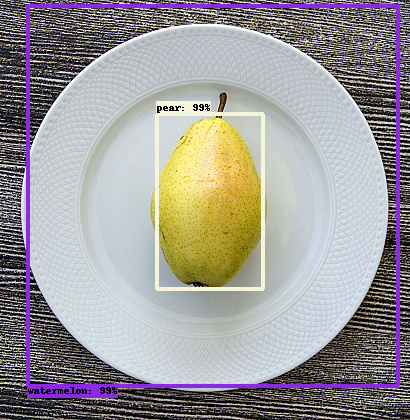

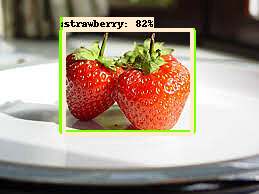

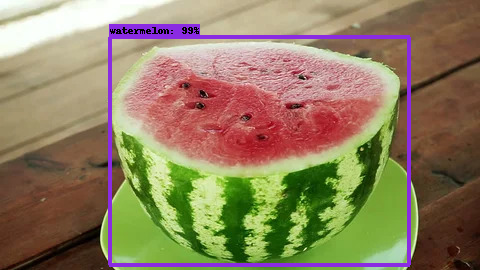

In [ ]:
for image_path in TEST_IMAGE_PATHS:
  show_inference(detection_model, image_path)

# Convert to tfLite

In [ ]:
TF_LITE_MODEL_FILE_NAME = "object-model.tflite"

In [ ]:
%cd '/content/drive/MyDrive/tensorflow1/models/research/object_detection/inference_graph'
!ls

/content/drive/MyDrive/tensorflow1/models/research/object_detection/inference_graph
checkpoint  object-model.tflite  saved_model
kosis	    pipeline.config	 saved_model_updated


In [ ]:
model = tf.saved_model.load("saved_model")
tf.saved_model.save(model, "saved_model_updated", signatures=model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY])

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir='saved_model_updated', signature_keys=['serving_default'])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]
tflite_model = converter.convert()

interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: saved_model_updated/assets


INFO:tensorflow:Assets written to: saved_model_updated/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

49950928

In [ ]:
# interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [  1 324 324   3]
Input Type: <class 'numpy.uint8'>
Output Shape: [  1 300   4]
Output Type: <class 'numpy.float32'>


In [ ]:
# interpreter = tf.lite.Interpreter(model_content=TF_LITE_MODEL_FILE_NAME)
input_data = np.array(np.random.random_sample(4), dtype=np.uint8)
interpreter.resize_tensor_input(0, [1, 324, 324, 3])
interpreter.allocate_tensors()
interpreter.set_tensor(0, input_data)
interpreter.invoke()

In [ ]:
input_data = np.array(np.random.random_sample(4), dtype=np.uint8)
print(input_data)

[0 0 0 0]
